In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pickle

Using matplotlib backend: agg


In [2]:
df=pd.read_csv("/content/data.csv",na_values="?")

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


EDA(exploratory Data Analysis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [5]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car name        0
dtype: int64

In [6]:
df.drop("car name", axis=1, inplace=True)

In [8]:
df1=df.dropna()

In [9]:
df1.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Splitting data into train and test

In [11]:
X=df1.drop("mpg",axis=1)
Y=df1["mpg"]

In [12]:
X.shape

(392, 7)

In [13]:
Y.shape

(392,)

In [14]:
Y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [15]:
Y.isnull().sum()

0

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [18]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
274,5,131.0,103.0,2830,15.9,78,2
157,8,350.0,145.0,4440,14.0,75,1
173,4,119.0,97.0,2545,17.0,75,3
357,4,119.0,100.0,2615,14.8,81,3
263,6,231.0,165.0,3445,13.4,78,1
...,...,...,...,...,...,...,...
64,8,318.0,150.0,4135,13.5,72,1
328,4,146.0,67.0,3250,21.8,80,2
341,6,173.0,110.0,2725,12.6,81,1
11,8,340.0,160.0,3609,8.0,70,1


In [19]:
X_train.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [20]:
X_train.dropna()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
274,5,131.0,103.0,2830,15.9,78,2
157,8,350.0,145.0,4440,14.0,75,1
173,4,119.0,97.0,2545,17.0,75,3
357,4,119.0,100.0,2615,14.8,81,3
263,6,231.0,165.0,3445,13.4,78,1
...,...,...,...,...,...,...,...
64,8,318.0,150.0,4135,13.5,72,1
328,4,146.0,67.0,3250,21.8,80,2
341,6,173.0,110.0,2725,12.6,81,1
11,8,340.0,160.0,3609,8.0,70,1


In [21]:
X_test.dropna()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
39,8,400.0,175.0,4464,11.5,71,1
285,8,305.0,130.0,3840,15.4,79,1
164,6,231.0,110.0,3039,15.0,75,1
220,4,85.0,70.0,1945,16.8,77,3
163,6,225.0,95.0,3785,19.0,75,1
...,...,...,...,...,...,...,...
17,6,200.0,85.0,2587,16.0,70,1
82,4,120.0,97.0,2506,14.5,72,3
58,4,97.5,80.0,2126,17.0,72,1
344,4,86.0,64.0,1875,16.4,81,1


Standard Scaler

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [23]:
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

In [24]:
X_train_std

array([[-0.24893345, -0.57765698, -0.02197412, ...,  0.11961844,
         0.54658592,  0.49337407],
       [ 1.52188861,  1.52787598,  1.06400983, ..., -0.55787761,
        -0.26938257, -0.74203461],
       [-0.83920747, -0.69302865, -0.17711468, ...,  0.51185299,
        -0.26938257,  1.72878276],
       ...,
       [ 0.34134057, -0.17385614,  0.15902321, ..., -1.05708522,
         1.36255441, -0.74203461],
       [ 1.52188861,  1.43173292,  1.45186124, ..., -2.6973388 ,
        -1.62933005, -0.74203461],
       [-0.83920747, -0.79878601, -0.74596341, ...,  0.44053762,
         1.36255441,  1.72878276]])

In [25]:
print(np.any(np.isnan(X_test_std)))
print(np.any(np.isnan(Y_test)))

False
False


In [26]:
X_test_std

array([[ 1.52188861e+00,  2.00859127e+00,  1.83971265e+00,
         1.78911930e+00, -1.44931977e+00, -1.35734055e+00,
        -7.42034609e-01],
       [ 1.52188861e+00,  1.09523222e+00,  6.76158422e-01,
         1.04842530e+00, -5.86699954e-02,  8.18575415e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  3.83773597e-01,  1.59023209e-01,
         9.76305932e-02, -2.01300742e-01, -2.69382568e-01,
        -7.42034609e-01],
       [-8.39207472e-01, -1.01991504e+00, -8.75247218e-01,
        -1.20095793e+00,  4.40537616e-01,  2.74596424e-01,
         1.72878276e+00],
       [ 3.41340567e-01,  3.26087762e-01, -2.28828201e-01,
         9.83139770e-01,  1.22500672e+00, -2.69382568e-01,
        -7.42034609e-01],
       [ 3.41340567e-01,  5.66445406e-01, -6.68393133e-01,
         7.32680740e-01,  1.93816045e+00,  2.60692807e-03,
        -7.42034609e-01],
       [-8.39207472e-01, -1.14490101e+00, -9.01103979e-01,
        -1.59504513e+00,  8.68429855e-01, -1.35734055e+00,
         1.7287827

In [78]:
Y_train

57     24.0
389    22.0
320    37.0
357    32.9
160    17.0
       ... 
63     14.0
326    43.4
337    32.4
11     14.0
351    34.4
Name: mpg, Length: 318, dtype: float64

In [79]:
Y_test

130    26.0
202    17.5
322    46.6
104    12.0
91     13.0
       ... 
138    14.0
171    24.0
157    15.0
17     21.0
225    17.5
Name: mpg, Length: 80, dtype: float64

In [ ]:
pickle.dump(sc,open("/content/sample_data/model/sclaer.pkl",'wb'))

Build Model  and **Train**

In [27]:

from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
len(X_train.keys())

7

In [29]:
X_train.keys()

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [30]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 64,activation='relu',input_shape=[len(X_train.keys())]))
# Adding the second hidden layer
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units = 64,activation='relu'))
model.add(Dense(units=1))
# Adding the output layer

# Compiling the ANN
model.compile(loss='mean_squared_error',
                optimizer='Adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


Training the **model**

In [85]:
X_train_std

array([[-0.84750898, -0.7596462 , -0.2601183 , ..., -0.01041762,
        -1.09361765,  1.75840623],
       [ 0.32938122,  0.38501828,  0.17870723, ..., -0.29848748,
         1.58153937, -0.7323429 ],
       [-0.84750898, -0.70193203, -0.3375581 , ..., -0.19046128,
         1.04650796,  1.75840623],
       ...,
       [-0.84750898, -0.81736038, -0.85382344, ...,  0.52971336,
         1.04650796,  1.75840623],
       [ 1.50627142,  1.42387345,  1.41774404, ..., -2.71107251,
        -1.62864905, -0.7323429 ],
       [-0.84750898, -0.90393164, -1.03451631, ...,  0.2416435 ,
         1.31402367, -0.7323429 ]])

In [86]:
Y_train

57     24.0
389    22.0
320    37.0
357    32.9
160    17.0
       ... 
63     14.0
326    43.4
337    32.4
11     14.0
351    34.4
Name: mpg, Length: 318, dtype: float64

In [32]:
#Fitting the ANN to the Training set
model_history=model.fit(X_train_std, Y_train, batch_size = 100,epochs = 1000)

Epoch 1/1000
4/4 [==============================] - 1s 4ms/step - loss: 608.7410 - mean_absolute_error: 23.3770 - mean_squared_error: 608.7410
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 596.7827 - mean_absolute_error: 23.0938 - mean_squared_error: 596.7827
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 571.0475 - mean_absolute_error: 22.6212 - mean_squared_error: 571.0475
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 561.8430 - mean_absolute_error: 22.2843 - mean_squared_error: 561.8430
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 527.6921 - mean_absolute_error: 21.5246 - mean_squared_error: 527.6921
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 471.3370 - mean_absolute_error: 20.1854 - mean_squared_error: 471.3370
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 422.3316 - mean_absolute_error: 18.9273 - mean_squared_error: 422.3316

In [33]:
model.evaluate(X_train_std,Y_train)

10/10 [==============================] - 0s 1ms/step - loss: 1.3275 - mean_absolute_error: 0.6822 - mean_squared_error: 1.3275


[1.3275370597839355, 0.6821731925010681, 1.3275370597839355]

In [34]:
model.evaluate(X_test_std,Y_test)

3/3 [==============================] - 0s 2ms/step - loss: 10.4357 - mean_absolute_error: 2.1029 - mean_squared_error: 10.4357


[10.435670852661133, 2.1029367446899414, 10.435670852661133]

In [35]:
prediction=model.predict(X_test_std)

In [36]:
prediction

array([[13.739417],
       [18.225739],
       [19.643559],
       [31.939926],
       [18.33465 ],
       [16.24686 ],
       [32.44156 ],
       [21.091446],
       [20.461441],
       [25.109303],
       [24.206474],
       [28.436508],
       [28.612667],
       [34.338066],
       [25.805859],
       [20.047985],
       [12.629597],
       [23.687963],
       [12.241215],
       [15.789523],
       [26.066572],
       [20.926865],
       [19.299358],
       [14.747494],
       [31.081541],
       [29.423626],
       [18.447454],
       [13.753183],
       [18.562534],
       [15.50926 ],
       [36.203934],
       [36.135574],
       [30.500471],
       [28.413368],
       [29.861393],
       [24.141674],
       [21.952534],
       [17.261822],
       [12.24919 ],
       [28.395615],
       [31.08869 ],
       [22.084927],
       [15.292143],
       [11.919107],
       [13.100079],
       [25.300545],
       [28.251846],
       [16.344128],
       [14.538462],
       [21.150337],


In [37]:
Y_test

39     14.0
285    17.0
164    21.0
220    33.5
163    18.0
       ... 
17     21.0
82     23.0
58     25.0
344    39.0
283    20.2
Name: mpg, Length: 79, dtype: float64

In [38]:
from sklearn.metrics import (mean_squared_error, mean_absolute_error,r2_score)

In [39]:
rmse=np.sqrt(mean_squared_error(Y_test,prediction))

In [40]:
rmse

3.230428937689228

In [42]:
rmse=np.sqrt(mean_squared_error(Y_test,prediction))

print('RMSE: ',rmse)

print('R_square:', r2_score(Y_test,prediction))

RMSE:  3.230428937689228
R_square: 0.8085290054270874


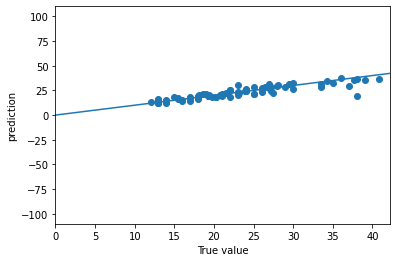

In [43]:
plt.scatter(Y_test,prediction)
plt.xlabel('True value')
plt.ylabel('prediction')
plt.xlim(0,plt.xlim()[1])
plt.xlim(0,plt.xlim()[1])
_=plt.plot([-100,100],[-100,100])

In [44]:
list1=[[4,97,100,5000,14.5,70,3]]
list1=sc.transform(list1)
list1

array([[-0.83920747, -0.90454337, -0.0995444 ,  2.42535646, -0.37958917,
        -1.62933005,  1.72878276]])

In [45]:
prediction2=model.predict(list1)

In [46]:
prediction2

array([[25.539505]], dtype=float32)

In [47]:
model.save("path/model.h5")